In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [29]:
headers={"user-agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"}
özellik_list = []
for i in range(1,24):
    url = f"https://www.hepsiemlak.com/kadikoy?districts=fenerbahce-mah,zuhtupasa&page={i}"
    #https://www.hepsiemlak.com/kadikoy?districts=kadikoy-bostanci-mah,fenerbahce-mah,kadikoy-erenkoy-mah,feneryolu-mah,zuhtupasa,kadikoy-suadiye-mah&page=2
    r = requests.get(url,headers=headers)
    soup = bs(r.content,"lxml")
    homes = soup.find_all('li',class_='listing-item')
    list = []
    for home in homes:
        fiyat_element = home.find('span',class_='list-view-price')
        if fiyat_element is not None:
            fiyat = fiyat_element.text.strip()
        else:
            fiyat = None

        tarih_element = home.find('span',class_='list-view-date')
        if tarih_element is not None:
            tarih = tarih_element.text.strip()
        else:
            tarih = None

        m2_element = home.find('span',class_='celly squareMeter list-view-size')
        if m2_element is not None:
            m2 = m2_element.text.strip()
        else:
            m2 = None

        kat_element = home.find('span',class_='celly floortype')
        if kat_element is not None:
            kat = kat_element.text.strip()
        else:
            kat = None

        oda_element = home.find('span',class_='celly houseRoomCount')
        if oda_element is not None:
            oda = oda_element.text.strip().replace('\n', '').replace(' ', '')
        else:
            oda = None

        yaş_element = home.find('span',class_='celly buildingAge')
        if yaş_element is not None:
            yaş = yaş_element.text.strip().replace('\n', '').replace(' ', '')
        else:
            yaş = None
        
        tür_element = home.find('span',class_='left')
        if tür_element is not None:
            tür = tür_element.text.strip().replace('\n', '').replace(' ', '')
        else:
            tür = None
            
        desc_element = home.find('header',class_='list-view-header')
        if desc_element is not None:
            desc = desc_element.text.strip().replace('\n', '').replace(' ', '')
        else:
            desc = None

        özellik = [tarih,m2,kat,oda,yaş,fiyat,desc,tür]
        özellik_list.append(özellik)

columns = ['Tarih', 'M²', 'Kat', 'Oda', 'Yaş', 'Fiyat','Desc','Tür']
df = pd.DataFrame(özellik_list, columns=columns)
# Fiyat sütununu temizle
df['Fiyat'] = df['Fiyat'].str.replace('\n', '').str.replace(' TL', '')

# Fiyat sütununu sayısal değere dönüştür
#df['Fiyat'] = pd.to_numeric(df['Fiyat'].str.replace('.', ''))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tarih   529 non-null    object
 1   M²      529 non-null    object
 2   Kat     476 non-null    object
 3   Oda     476 non-null    object
 4   Yaş     521 non-null    object
 5   Fiyat   529 non-null    object
 6   Desc    529 non-null    object
 7   Tür     529 non-null    object
dtypes: object(8)
memory usage: 33.2+ KB


In [31]:
#df.to_csv("Kalamış23.05.2024.csv")

In [30]:
df.head()

,Tarih,M²,Kat,Oda,Yaş,Fiyat,Desc,Tür
0,22-05-2024,100 m²,2. Kat,2+1,5Yaşında,65.000,FenerbahçeSahil2+1FullModernEşyalı5YıllıkKiral...,KiralıkDaire
1,15-04-2024,115 m²,Kot 1,3+1,6Yaşında,24.000.000,FenerbahçeDalyanSitesindeHavuzlu3+1Denize100mM...,SatılıkDaire
2,21-05-2024,130 m²,6. Kat,3+1,SıfırBina,12.900.000,YetkiliKalamışBağdatSahilAraDenizManBalkon3+1S...,SatılıkDaire
3,23-05-2024,145 m²,4. Kat,3+1,4Yaşında,16.950.000,KalamışVaronYetkiliSahilde4yıllık145m2Güvenlik...,SatılıkDaire
4,23-05-2024,90 m²,7. Kat,2+1,SıfırBina,8.200.000,Zühtüpaşa'daBağdat'a1.ParalelBalkonlu67m2Net2+...,SatılıkDaire


In [36]:
df['Tür'].unique()

array(['KiralıkDaire', 'SatılıkDaire', 'KiralıkOfis',
       'SatılıkApartmanDairesi', 'KiralıkDükkan&Mağaza',
       'SatılıkDükkan&Mağaza', 'SatılıkOfis', 'KiralıkApartmanDairesi',
       'SatılıkMüstakilEv', 'SatılıkGenel', 'KiralıkGenel',
       'SatılıkVilla', 'SatılıkMuhtelifArsa', 'KiralıkCafe&Bar',
       'SatılıkCafe&Bar'], dtype=object)

In [37]:
df['M²'] = df['M²'].str.replace('m²','')
df['M²'] = df['M²'].str.replace('.','')
df['M²'] = df['M²'].astype(int)

/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/304083543.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['M²'] = df['M²'].str.replace('.','')


In [38]:
df['Salon'] = df['Oda'].str[-1]
df['Oda'] = df['Oda'].str[0]
df[['Oda','Salon']] = df[['Oda','Salon']].apply(pd.to_numeric,errors='coerce')

In [39]:
df['Fiyat'] = df['Fiyat'].str.replace('.','')
df['Fiyat'] = pd.to_numeric(df['Fiyat'],errors='coerce')

/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/2010340603.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Fiyat'] = df['Fiyat'].str.replace('.','')


In [40]:
df['Yaş'] = df['Yaş'].replace('SıfırBina','0Yaşında')
df['Yaş'] = df['Yaş'].str.replace('Yaşında','')
df['Yaş'] = pd.to_numeric(df['Yaş'],errors='coerce')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tarih   529 non-null    object 
 1   M²      529 non-null    int64  
 2   Kat     476 non-null    object 
 3   Oda     475 non-null    float64
 4   Yaş     521 non-null    float64
 5   Fiyat   529 non-null    int64  
 6   Desc    529 non-null    object 
 7   Tür     529 non-null    object 
 8   Salon   475 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 37.3+ KB


In [42]:
df['Kat'].value_counts()

3. Kat          77
2. Kat          68
7. Kat          54
1. Kat          49
4. Kat          45
8. Kat          39
5. Kat          26
6. Kat          19
Yüksek Giriş    17
10. Kat         13
9. Kat          12
11. Kat         11
Ara Kat         10
Bahçe Katı       9
Çatı Katı        4
En Üst Kat       3
12. Kat          3
13. Kat          3
Kot 1            2
15. Kat          2
                 2
19. Kat          2
16. Kat          2
Zemin            2
Giriş Katı       1
21 ve üzeri      1
Name: Kat, dtype: int64

In [43]:
df['Kat'] = df['Kat'].str.replace('Yüksek Giriş','0. Kat').replace('Bahçe Katı','0. Kat').replace('Zemin','0. Kat').replace('Giriş Katı','0. Kat')
df['Kat'] = df['Kat'].str.replace('. Kat','')
df['Kat'] = pd.to_numeric(df['Kat'],errors='coerce')

/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/1129769975.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Kat'] = df['Kat'].str.replace('. Kat','')


In [44]:
df['Kat'].value_counts()

3.0     77
2.0     68
7.0     54
1.0     49
4.0     45
8.0     39
0.0     29
5.0     26
6.0     19
10.0    13
9.0     12
11.0    11
12.0     3
13.0     3
15.0     2
19.0     2
16.0     2
Name: Kat, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tarih   529 non-null    object 
 1   M²      529 non-null    int64  
 2   Kat     454 non-null    float64
 3   Oda     475 non-null    float64
 4   Yaş     521 non-null    float64
 5   Fiyat   529 non-null    int64  
 6   Desc    529 non-null    object 
 7   Tür     529 non-null    object 
 8   Salon   475 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 37.3+ KB


In [46]:
df['Manzara'] = df['Desc'].str.contains('manzara',case=False).astype(int)
df['Dubleks'] = df['Desc'].str.contains('dubleks',case=False).astype(int)

In [47]:
df.isnull().sum()

Tarih       0
M²          0
Kat        75
Oda        54
Yaş         8
Fiyat       0
Desc        0
Tür         0
Salon      54
Manzara     0
Dubleks     0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 1 to 528
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   M²       435 non-null    int64  
 1   Kat      417 non-null    float64
 2   Oda      435 non-null    float64
 3   Yaş      435 non-null    float64
 4   Fiyat    435 non-null    int64  
 5   Salon    435 non-null    float64
 6   Manzara  435 non-null    int64  
 7   Dubleks  435 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 30.6 KB


In [53]:
del df['Desc']
df = df[df['Tür']=='SatılıkDaire']

In [55]:
df.drop(columns=['Tür', 'Tarih'], inplace=True)

In [57]:
import missingno as msno

<Axes: >

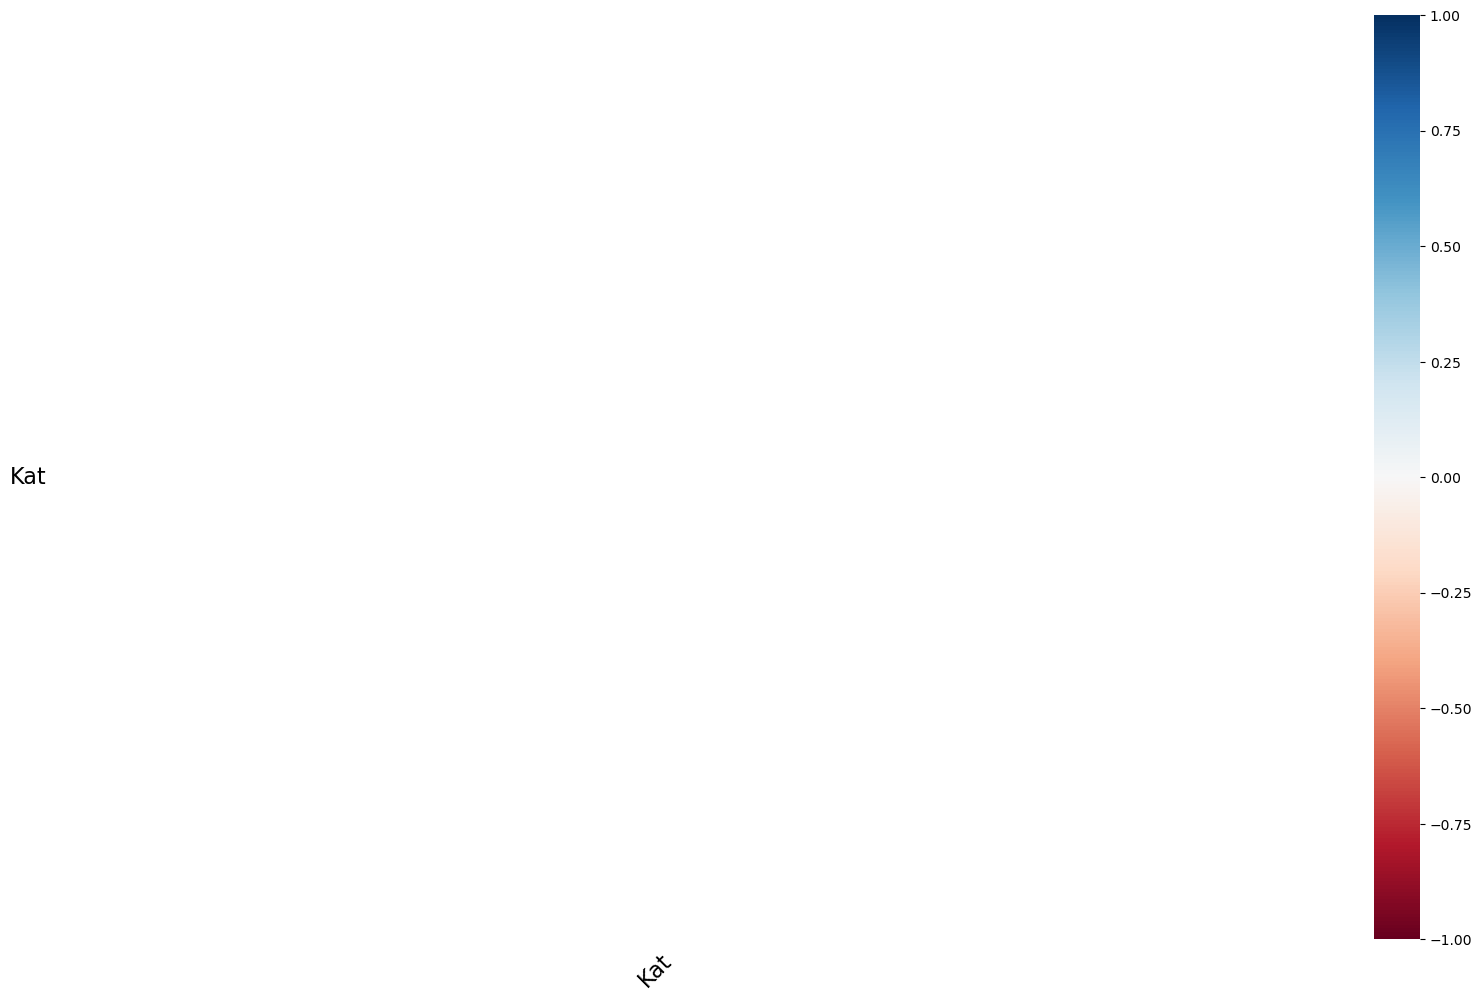

In [58]:
msno.heatmap(df)

<Axes: >

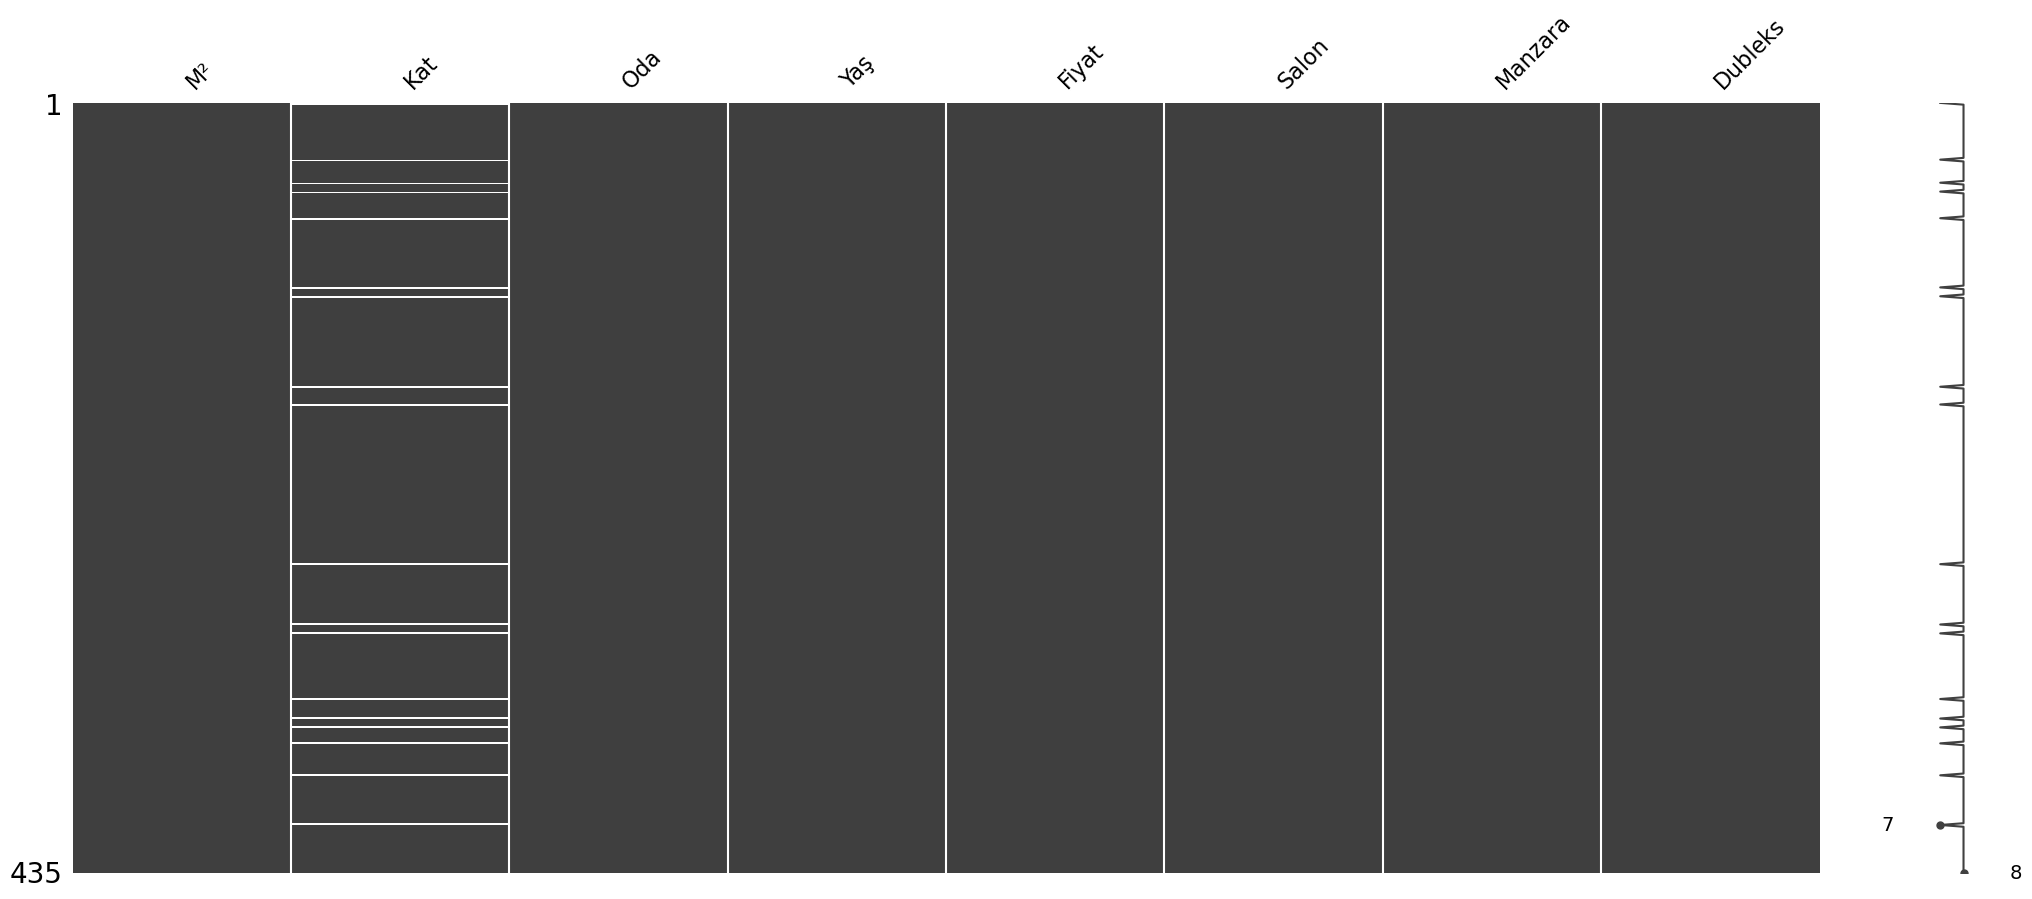

In [60]:
msno.matrix(df)

In [61]:
del df['Desc']

In [61]:
from ycimpute.imputer import EM
n_df = np.array(df)
dff = EM().complete(n_df)

In [62]:
df = pd.DataFrame(dff,columns=df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   M²       435 non-null    float64
 1   Kat      435 non-null    float64
 2   Oda      435 non-null    float64
 3   Yaş      435 non-null    float64
 4   Fiyat    435 non-null    float64
 5   Salon    435 non-null    float64
 6   Manzara  435 non-null    float64
 7   Dubleks  435 non-null    float64
dtypes: float64(8)
memory usage: 27.3 KB


In [63]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20)
model = lof.fit_predict(df)

In [64]:
count = np.count_nonzero(model== 1)
count

334

In [65]:
df = df[model!=-1]
df.describe()

,M²,Kat,Oda,Yaş,Fiyat,Salon,Manzara,Dubleks
count,334.000000,334.000000,334.000000,334.000000,3.340000e+02,334.000000,334.000000,334.000000
mean,153.416168,4.646707,3.041916,9.356287,2.122347e+07,1.035928,0.239521,0.056886
std,51.390548,3.375549,0.796790,11.960722,1.044586e+07,0.186390,0.427431,0.231973
min,50.000000,0.000000,1.000000,0.000000,7.300000e+06,1.000000,0.000000,0.000000
25%,124.250000,2.000000,3.000000,2.000000,1.345000e+07,1.000000,0.000000,0.000000
50%,140.000000,4.000000,3.000000,4.000000,1.947500e+07,1.000000,0.000000,0.000000
75%,177.250000,7.000000,3.000000,10.000000,2.675000e+07,1.000000,0.000000,0.000000
max,385.000000,16.000000,6.000000,46.000000,5.900000e+07,2.000000,1.000000,1.000000


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

def regression_(x, y):
    
    lr = LinearRegression()
    r = Ridge()
    l = Lasso()
    e = ElasticNet()
    kn = KNeighborsRegressor()
    ext = ExtraTreeRegressor()
    gb = GradientBoostingRegressor()
    dt = DecisionTreeRegressor()
    
       
    algos = [lr, r, l, e, kn, ext, gb, dt]
    algos_names = ['LinearRegressor', 'Ridge', 'Lasso', 'ElasticNet', 'KNeighbors', 'ExtraTree', 'GradientBoosting', 'DecisionTree']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
    
    r_score = []
    mse = []
    mae = []
    
    result = pd.DataFrame(columns=['R_square', 'MSE', 'MAE'], index=algos_names)
    
    for algo in algos:
        pred = algo.fit(x_train, y_train).predict(x_test)
        r_score.append(r2_score(y_test, pred))
        mse.append(mean_squared_error(y_test, pred) ** .5)
        mae.append(mean_absolute_error(y_test, pred))
    
    result.R_square = r_score
    result.MSE = mse
    result.MAE = mae
    
    return result.sort_values('R_square', ascending=False)

In [67]:
from sklearn.linear_model import LinearRegression
x = df[['M²','Kat','Oda','Yaş','Salon','Manzara','Dubleks']]
y = df['Fiyat']
regression_(x, y)

,R_square,MSE,MAE
GradientBoosting,0.731210,4.807572e+06,2.828260e+06
LinearRegressor,0.678904,5.254560e+06,3.368501e+06
Lasso,0.678904,5.254561e+06,3.368501e+06
Ridge,0.678176,5.260514e+06,3.369172e+06
ElasticNet,0.646674,5.511972e+06,3.532530e+06
KNeighbors,0.538430,6.299956e+06,3.465955e+06
DecisionTree,0.391467,7.233706e+06,3.352960e+06
ExtraTree,0.367585,7.374284e+06,3.399776e+06


In [68]:
gb = GradientBoostingRegressor()
dataframe = pd. DataFrame()
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=i)
    model = gb.fit(x_train, y_train)
    y_pretest = model.predict(x_test)
    r2score = r2_score(y_test, y_pretest)
    mse = mean_squared_error(y_test, y_pretest) ** .5
    mae = mean_absolute_error(y_test,y_pretest)
    
    data = {
    'M²': [119, 127, 127, 127, 127, 127, 127, 193],
    'Kat': [0, 1, 2, 3, 4, 5, 6, 7],
    'Oda': [2, 3, 3, 3, 3, 3, 3, 3],
    'Yaş': [0, 0, 0, 0, 0, 0, 0, 0],
    'Salon': [1, 1, 1, 1, 1, 1, 1, 2],
    'Manzara': [0, 0, 0, 0, 1, 1, 1, 1],
    'Dubleks': [0, 0, 0, 0, 0, 0, 0, 1]  # Dubleks sütununa uygun veriyi ekledik
    }

    kal = pd.DataFrame(data, columns=['M²', 'Kat', 'Oda', 'Yaş', 'Salon', 'Manzara','Dubleks'])
    y_pretest_kal = model.predict(kal)
    kal['Fiyat'] = y_pretest_kal
    kal['mse'] = mse
    kal['mae'] = mae
    kal['r2'] = r2score
    dataframe = dataframe.append(kal, ignore_index=True)

/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/3960207551.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(kal, ignore_index=True)
/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/3960207551.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(kal, ignore_index=True)
/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/3960207551.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(kal, ignore_index=True)
/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/3960207551.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/3960207551.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(kal, ignore_index=True)
/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/3960207551.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(kal, ignore_index=True)
/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/3960207551.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(kal, ignore_index=True)
/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/3960207551.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [69]:
dataframe1 = pd. DataFrame()
for i in range(0,8):
    row = dataframe[dataframe['Kat'] == i]
    new_row = row.mean()
    #display(new_row)
    dataframe1 = dataframe1.append(new_row,ignore_index=True)
dataframe1

/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/1237507733.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe1 = dataframe1.append(new_row,ignore_index=True)
/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/1237507733.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe1 = dataframe1.append(new_row,ignore_index=True)
/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/1237507733.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe1 = dataframe1.append(new_row,ignore_index=True)
/var/folders/bc/ldqjky0n44v8wx89hp6dtbjh0000gn/T/ipykernel_95331/1237507733.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

,M²,Kat,Oda,Yaş,Salon,Manzara,Dubleks,Fiyat,mse,mae,r2
0,119.0,0.0,2.0,0.0,1.0,0.0,0.0,1.633073e+07,5.674803e+06,3.558175e+06,0.679943
1,127.0,1.0,3.0,0.0,1.0,0.0,0.0,2.060880e+07,5.674803e+06,3.558175e+06,0.679943
2,127.0,2.0,3.0,0.0,1.0,0.0,0.0,1.960651e+07,5.674803e+06,3.558175e+06,0.679943
3,127.0,3.0,3.0,0.0,1.0,0.0,0.0,1.955705e+07,5.674803e+06,3.558175e+06,0.679943
4,127.0,4.0,3.0,0.0,1.0,1.0,0.0,2.027769e+07,5.674803e+06,3.558175e+06,0.679943
5,127.0,5.0,3.0,0.0,1.0,1.0,0.0,2.011511e+07,5.674803e+06,3.558175e+06,0.679943
6,127.0,6.0,3.0,0.0,1.0,1.0,0.0,2.008896e+07,5.674803e+06,3.558175e+06,0.679943
7,193.0,7.0,3.0,0.0,2.0,1.0,1.0,4.211340e+07,5.674803e+06,3.558175e+06,0.679943


In [70]:
#dataframe1.to_excel("KalamışTahmin23.05.2024.xlsx")